## SVM

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("formated_data_1111.csv")
data.head()

# Min_Max scaler for GDP
data['GDP'] = (data['GDP per capita'] - 
               data['GDP per capita'].min())/(data['GDP per capita'].max() - data['GDP per capita'].min())

data_1 = data[['intern_num','max_sal','min_sal','GDP per capita','GDP','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
data_1

#确定 X和 y

X = data_1[['intern_num','GDP per capita','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
y = data_1['max_sal']

### 1.1 Max Salary for Selected Columns

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

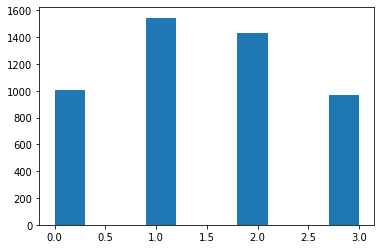

In [2]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [3]:
print('bench mark: {}'.format(1545/4950))

bench mark: 0.31212121212121213


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm

# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 2, gamma = 200)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

print('===================================')

train_acc = []
test_acc = []


# for i in range(1,15):
#     clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = i, gamma = 200)
#     clf.fit(X_train_scaled, y_train)

#     y_pred = clf.predict(X_test_scaled)
#     acc_test = (accuracy_score(y_pred,y_test))
#     test_acc.append(acc_test)
    
#     y_pred = clf.predict(X_train_scaled)
#     acc_train = (accuracy_score(y_pred,y_train))
#     train_acc.append(acc_train)
    
# #     print('C: {}'.format(i))
# #     print('train accuracy: {}'.format(acc_train))
# #     print('test accuracy: {}'.format(acc_test))
# print('Done')

kernel = rbf
train accuracy: 0.6313131313131313
test accuracy: 0.4414141414141414


[0.6179292929292929, 0.6313131313131313, 0.6401515151515151, 0.6494949494949495, 0.6542929292929293, 0.6593434343434343, 0.6628787878787878, 0.6636363636363637, 0.6659090909090909, 0.6669191919191919, 0.6674242424242425, 0.6734848484848485, 0.675, 0.6752525252525252]
[0.44242424242424244, 0.4414141414141414, 0.4494949494949495, 0.45555555555555555, 0.4595959595959596, 0.45656565656565656, 0.4535353535353535, 0.45555555555555555, 0.45454545454545453, 0.45555555555555555, 0.4494949494949495, 0.45252525252525255, 0.4535353535353535, 0.45555555555555555]


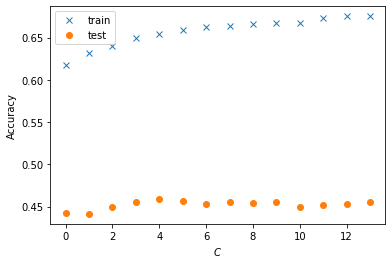

In [6]:
print(train_acc)
print(test_acc)

plt.plot(train_acc,'x',label="train");
plt.plot(test_acc,'o',label="test");
plt.xlabel('$C$'); plt.ylabel('Accuracy')
plt.legend();

In [7]:
train_acc = []
test_acc = []


for i in range(1,30):
    clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 8, gamma = 20*i)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)
    acc_test = (accuracy_score(y_pred,y_test))
    test_acc.append(acc_test)
    
    y_pred = clf.predict(X_train_scaled)
    acc_train = (accuracy_score(y_pred,y_train))
    train_acc.append(acc_train)
    
#     print('C: {}'.format(i))
#     print('train accuracy: {}'.format(acc_train))
#     print('test accuracy: {}'.format(acc_test))
print('Done')

Done


[0.5643939393939394, 0.5914141414141414, 0.6154040404040404, 0.6267676767676768, 0.6353535353535353, 0.6421717171717172, 0.6494949494949495, 0.6568181818181819, 0.6601010101010101, 0.6636363636363637, 0.6656565656565656, 0.6737373737373737, 0.6765151515151515, 0.6797979797979798, 0.6808080808080809, 0.6851010101010101, 0.6891414141414142, 0.6891414141414142, 0.6931818181818182, 0.695959595959596, 0.701010101010101, 0.7007575757575758, 0.7032828282828283, 0.7045454545454546, 0.7078282828282828, 0.7093434343434344, 0.7098484848484848, 0.7106060606060606, 0.7108585858585859]
[0.4303030303030303, 0.4414141414141414, 0.4404040404040404, 0.4393939393939394, 0.44747474747474747, 0.4484848484848485, 0.4535353535353535, 0.45555555555555555, 0.45454545454545453, 0.45555555555555555, 0.45151515151515154, 0.4535353535353535, 0.45252525252525255, 0.45656565656565656, 0.4616161616161616, 0.46565656565656566, 0.4626262626262626, 0.46464646464646464, 0.4676767676767677, 0.4626262626262626, 0.460606060

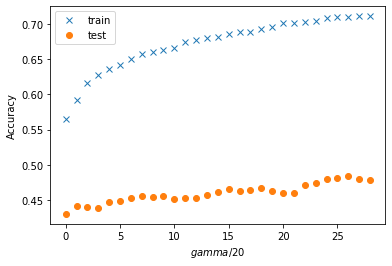

In [8]:
print(train_acc)
print(test_acc)

plt.plot(train_acc,'x',label="train");
plt.plot(test_acc,'o',label="test");
plt.xlabel('$gamma / 20$'); plt.ylabel('Accuracy')
plt.legend();

In [6]:
# GridSearch

from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'C': [x for x in range(2,30,2)],
    'gamma': [x for x in range(200,600,50)]
}

grid_search = GridSearchCV(svm.SVC(), param_grid = parameters, scoring = 'accuracy', cv=4, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
#print(grid_search.cv_results_)
print(grid_search.best_params_)

# gamma 应该大一些，sigma小(1/sigma^2)，来提高精度，那个图形更尖更集中。
# 1/C C越大，regularization越弱。

{'C': 18, 'gamma': 350}


In [7]:
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 18, gamma = 350)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

kernel = rbf
train accuracy: 0.7047979797979798
test accuracy: 0.4666666666666667


### 1.1 Max Salary for Selected Columns

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

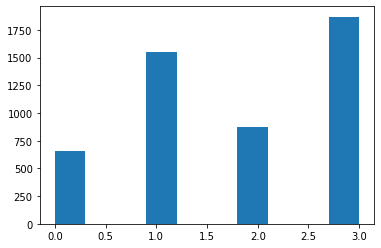

In [8]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [9]:
print('bench mark: {}'.format(1869/4950))

bench mark: 0.37757575757575756


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 2, gamma = 200)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

train_acc = []
test_acc = []


# for i in range(1,15):
#     clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = i, gamma = 200)
#     clf.fit(X_train_scaled, y_train)

#     y_pred = clf.predict(X_test_scaled)
#     acc_test = (accuracy_score(y_pred,y_test))
#     test_acc.append(acc_test)
    
#     y_pred = clf.predict(X_train_scaled)
#     acc_train = (accuracy_score(y_pred,y_train))
#     train_acc.append(acc_train)
    
#     print('C: {}'.format(i))
#     print('train accuracy: {}'.format(acc_train))
#     print('test accuracy: {}'.format(acc_test))
# print('Done')

kernel = rbf
train accuracy: 0.6702020202020202
test accuracy: 0.5050505050505051


In [11]:
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 18, gamma = 350)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

kernel = rbf
train accuracy: 0.7406565656565657
test accuracy: 0.5232323232323233


### 2.1 Max Salary for All Columns

In [20]:
data = pd.read_csv("formated_data_1111.csv")
data2 = data.drop(['max_sal', 'min_sal', 'city','GDP(billion)', 'Population(thousand)'], axis = 1)
data2

,intern_num,month_num,day,2000,500-2000,50-500,<50,互联网,教育,房产,...,媒体,内容,专员,产品,销售,开发,工程师,助理,运营,GDP per capita
0,176,3,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
1,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
2,44,5,4,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,162518.5736
3,486,4,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,162518.5736
4,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,162518.5736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,73,6,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,169782.5765
4946,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,169782.5765
4947,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765
4948,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765


In [21]:
X = data2
y = data['max_sal']

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

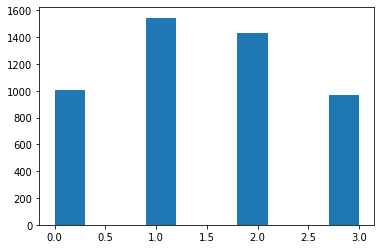

In [22]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [23]:
# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# GridSearch

from sklearn.model_selection import GridSearchCV
import sklearn.metrics

parameters = {
    'C': [x for x in range(2,30,2)],
    'gamma': [x for x in range(200,600,50)]
}

grid_search = GridSearchCV(svm.SVC(), param_grid = parameters, scoring = 'accuracy', cv=4, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
#print(grid_search.cv_results_)
print(grid_search.best_params_)

# gamma 应该大一些，sigma小(1/sigma^2)，来提高精度，那个图形更尖更集中。
# 1/C C越大，regularization越弱。

{'C': 28, 'gamma': 350}


In [30]:
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 28, gamma = 350)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

kernel = rbf
train accuracy: 0.9452020202020202
test accuracy: 0.3717171717171717


### 2.2 Min Salary All Columns

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

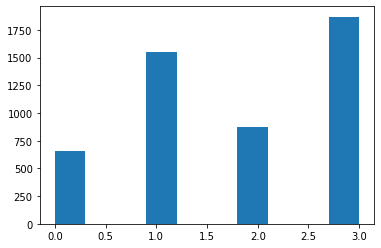

In [31]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
clf = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf', C = 28, gamma = 350)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc_test = (accuracy_score(y_pred,y_test))
y_pred = clf.predict(X_train_scaled)
acc_train = (accuracy_score(y_pred,y_train))
print('kernel = rbf')
print('train accuracy: {}'.format(acc_train))
print('test accuracy: {}'.format(acc_test))

kernel = rbf
train accuracy: 0.95
test accuracy: 0.4414141414141414
